```
     _                                     ____             _       _   ____                                    
    / \   _ __ ___   __ _ _______  _ __   / ___|  ___   ___(_) __ _| | |  _ \ _ __ ___   __ _ _ __ ___  ___ ___ 
   / _ \ | '_ ` _ \ / _` |_  / _ \| '_ \  \___ \ / _ \ / __| |/ _` | | | |_) | '__/ _ \ / _` | '__/ _ \/ __/ __|
  / ___ \| | | | | | (_| |/ / (_) | | | |  ___) | (_) | (__| | (_| | | |  __/| | | (_) | (_| | | |  __/\__ \__ \
 /_/   \_\_| |_| |_|\__,_/___\___/|_| |_| |____/ \___/ \___|_|\__,_|_| |_|   |_|  \___/ \__, |_|  \___||___/___/
                                                                                        |___/                   
```

### Module
__SGDRegressor__ Linear model fitted by minimizing a regularized empirical loss with SGD.

### Goal
Investigating the relationship between independent variables or features and a dependent variable or outcome.

### Tools
1. Pandas
2. scikit-learn
3. SGDRegressor

### Requirement
1. File Definition
2. Data Preparation
3. hotspot_spi.csv generated
 
### Data Source
__${WORKDIR}__/data/ouptut/hotspot_spi.csv

In [1]:
import os
import sys

supervised_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
sys.path.append(supervised_dir)
sys.path

['/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised/regression',
 '/opt/anaconda3/lib/python39.zip',
 '/opt/anaconda3/lib/python3.9',
 '/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.9/site-packages',
 '/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised']

In [2]:
import pandas as pd
import numpy as np

import functions_regression as freg
from  load_dataset import LoadDataset, SpiType

from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

## Get the data

In [3]:
load_dataset = LoadDataset()
X, y = load_dataset.return_X_y_regr(spi_type = SpiType.INDICATORS)

columns_names = X.columns

X = scale(X)

In [4]:
print("X.shape:", X.shape, "y.shape:", y.shape)

X.shape: (2313, 49) y.shape: (2313,)


### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print("X_train.shape:", X_train.shape, "y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape, "y_test.shape:", y_test.shape)

X_train.shape: (1619, 49) y_train.shape: (1619,)
X_test.shape: (694, 49) y_test.shape: (694,)


## Modeling

### Building, train and predict model

In [6]:
params = {
    "alpha":1e-2, 
    "loss": "squared_error", 
    "max_iter": 3000, 
    "penalty": "elasticnet", 
    "tol":1e-3,
    "early_stopping": True
}

regressor = SGDRegressor(**params)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Getting Best Hyperparameter Optimization

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [7]:
# from sklearn.model_selection import (GridSearchCV)
# import warnings

# warnings.filterwarnings("ignore")

# parameters = {
#     "loss": ("squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"),
#     "penalty": ("l2", "l1", "elasticnet"),
#     "max_iter":[1000, 2000, 3000, 4000, 5000],
#     "tol": [1e-2, 1e-3, 1e-4, 1e-5],
#     "alpha": [0.0001, 0.001, 0.01, 0.1]
# }

# gridsearch = GridSearchCV(SGDRegressor(), parameters)
# gridsearch.fit(X_train, y_train)

# print("Tuned Hyperparameters :", gridsearch.best_params_)
# print("Best Score:",gridsearch.best_score_)

### Model Evaluation

In [8]:
freg.evaluate_model(regressor, X, y, X_train, y_train, X_test, y_test, y_pred)


Model-evaluation
----------------------------------------------------------------------
Score: 0.4370
CV train mean score:0.3978
K-fold CV average score: 0.40
R²: 0.3529
Max Error: 3522.1066
Explained Variance: 0.3531
MSE: 291880.7119
RMSE: 145940.3560
MAE: 440.3338


### Plor Prediction Result

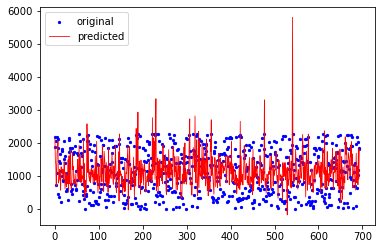

In [9]:
freg.plot_prediction_result(y_test, y_pred)

In [10]:
print("Number of features seen during fit:", regressor.n_features_in_)
print("Constants in decision function:", regressor.intercept_)
print("Weights assigned to the features:\n", regressor.coef_)

Number of features seen during fit: 49
Constants in decision function: [1138.61260786]
Weights assigned to the features:
 [  21.79600395    4.8324729     6.86935159   13.79661154  -16.1778037
   -1.96503655   23.28584513  -24.45033807    9.41076247   14.56677569
 -227.65977957  202.8040642   -91.90095118   81.64883049   51.94013252
   58.12402688   28.1699569    84.40618796 -127.2788639    -4.88231572
   83.75950731   36.78965776   98.07050333 -122.59798375   12.19309536
  -64.4735095   -34.81697919  -46.95374727   74.01736091  -25.35143361
  -57.72075439  -20.38621757  -99.72290812   13.04762761  153.17999927
  178.09025112  -44.67297515   -2.8251898    47.49549471   23.61216795
  -79.35162423  -23.18299594   23.62732307   31.56246778   28.59519721
  -54.90678424    1.55650888   12.4338466    38.14708171]
